In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
file_path='/kaggle/input/house-prices-advanced-regression-techniques/train.csv'

In [4]:
file=pd.read_csv(file_path)

In [5]:
file.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
null_val=file.isnull()

In [8]:
null_count=null_val.sum()

In [9]:
columns=null_count.sort_values(ascending=False)

In [10]:
file.set_index('Id',inplace=True)

In [11]:
columns.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Id', 'Functional',
       'Fireplaces', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath',
       'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GrLivArea',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual', 'HouseStyle',
       'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig',
       'YearBuilt', 'Utilities', 'LandContour', 'LotShape', 'Street',
       'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd', '2ndFlrSF',
       'BsmtFinSF2', '1stF

In [12]:
file[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']].isnull().sum()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
dtype: int64

In [13]:
file.drop_duplicates(inplace=True)

In [14]:
# these 4 columns have high missing values(around 1400 values are missing out of 1100) so they were deleted
file.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'],inplace=True)

In [15]:
column=file.isnull().sum().sort_values(ascending=False)

In [16]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [17]:
file[[ 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical']].isnull().sum()

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [18]:
file['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [19]:
#lot frontage should be of integer or float type but some values are in string form so
# Replace all string values with NaN
file['LotFrontage']= file['LotFrontage'].replace(to_replace=r'^.*$', value=np.nan, regex=True)

In [20]:
file.LotFrontage.astype('float64')

Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [21]:
file.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
# missing values in lotfrontage replaced by median
file.LotFrontage.fillna(file.LotFrontage.median(),inplace=True)

In [23]:
file.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSZoning          0
SalePrice         0
Length: 76, dtype: int64

In [24]:
file.FireplaceQu.fillna(file.FireplaceQu.mode()[0],inplace=True)

In [25]:
file.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSZoning         0
SalePrice        0
Length: 76, dtype: int64

In [26]:
file.GarageYrBlt.fillna(file.GarageYrBlt.median(),inplace=True)

In [27]:
file.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSZoning         0
SalePrice        0
Length: 76, dtype: int64

In [28]:
file.fillna(file.mode(),inplace=True)

In [29]:
file.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [30]:
file.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.179459,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.179459,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [31]:
#correlation of saleprice and mssubclass is very low (-0.084284).Similarly we have so many parameters that do not affect price that much so deleting them 
# Set the threshold for correlation
corr_threshold = 0.5

# Identify variables with low correlation to the dependent variable
corr_matrix = file.corr()
low_corr_vars = []
for var in corr_matrix.columns:
    if abs(corr_matrix[var]['SalePrice']) < corr_threshold:
        low_corr_vars.append(var)
file = file.drop(low_corr_vars, axis=1)

In [32]:
file.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [33]:
file.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,548,TA,TA,Y,WD,Normal,208500
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,460,TA,TA,Y,WD,Normal,181500
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,608,TA,TA,Y,WD,Normal,223500
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,642,TA,TA,Y,WD,Abnorml,140000
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,836,TA,TA,Y,WD,Normal,250000


In [34]:
columns.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Id', 'Functional',
       'Fireplaces', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath',
       'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GrLivArea',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual', 'HouseStyle',
       'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig',
       'YearBuilt', 'Utilities', 'LandContour', 'LotShape', 'Street',
       'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd', '2ndFlrSF',
       'BsmtFinSF2', '1stF

In [35]:
file.select_dtypes(include='object').columns.tolist()


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [36]:
file[['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']]


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [37]:
#let's encode the data
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
file['MSZoning']=encode.fit_transform(file['MSZoning'])
file['Street']=encode.fit_transform(file['Street'])
file['LotShape']=encode.fit_transform(file['LotShape'])
file['LandContour']=encode.fit_transform(file['LandContour'])
file['LotConfig']=encode.fit_transform(file['LotConfig'])
file['LandSlope']=encode.fit_transform(file['LandSlope'])
file['Neighborhood']=encode.fit_transform(file['Neighborhood'])

In [38]:
#let us find correlation again
file.corr()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
MSZoning,1.000000,0.087654,0.061887,-0.017854,-0.009895,-0.022055,-0.249679,-0.160099,-0.308908,-0.174728,-0.087834,-0.055614,-0.082615,-0.198290,-0.043200,-0.157042,-0.189250,-0.166872
Street,0.087654,1.000000,-0.010224,0.115995,0.013960,-0.179360,-0.011561,0.058823,0.021137,0.065465,0.005068,0.005950,0.044121,0.046471,0.046828,-0.020025,-0.047794,0.041036
LotShape,0.061887,-0.010224,1.000000,0.085434,0.221102,-0.099951,-0.038894,-0.190497,-0.226062,-0.153825,-0.175782,-0.172613,-0.175093,-0.159390,-0.119250,-0.183906,-0.160639,-0.255580
LandContour,-0.017854,0.115995,0.085434,1.000000,-0.025527,-0.374267,0.019116,0.028907,0.161622,0.093374,0.005189,-0.042103,-0.068523,0.050363,-0.053458,0.045769,0.047626,0.015453
LotConfig,-0.009895,0.013960,0.221102,-0.025527,1.000000,-0.007256,-0.036597,-0.031086,0.013629,-0.005161,-0.040049,-0.062414,-0.089208,-0.007531,-0.049246,-0.066967,-0.064023,-0.067396
LandSlope,-0.022055,-0.179360,-0.099951,-0.374267,-0.007256,1.000000,-0.080405,-0.066450,-0.073639,-0.059105,0.032498,0.068323,0.043860,-0.046936,-0.033768,-0.002683,0.004826,0.051152
Neighborhood,-0.249679,-0.011561,-0.038894,0.019116,-0.036597,-0.080405,1.000000,0.196593,0.101289,0.102671,0.147762,0.164717,0.148266,0.137909,0.106580,0.194063,0.213578,0.210851
OverallQual,-0.160099,0.058823,-0.190497,0.028907,-0.031086,-0.066450,0.196593,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,-0.308908,0.021137,-0.226062,0.161622,0.013629,-0.073639,0.101289,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,-0.174728,0.065465,-0.153825,0.093374,-0.005161,-0.059105,0.102671,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101


In [39]:
imp=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

In [40]:
y=file.SalePrice
X=file[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

In [41]:
from sklearn.preprocessing import StandardScaler
# standard scaler
scaler = StandardScaler()
x=scaler.fit_transform(X)

In [42]:
scaled_x = pd.DataFrame(x,columns=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea'])

In [43]:
scaled_x,y

(      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
 0        0.651479   1.050994      0.878668    -0.459303 -0.793434   0.370333   
 1       -0.071836   0.156734     -0.429577     0.466465  0.257140  -0.482512   
 2        0.651479   0.984752      0.830215    -0.313369 -0.627826   0.515013   
 3        0.651479  -1.863632     -0.720298    -0.687324 -0.521734   0.383659   
 4        1.374795   0.951632      0.733308     0.199680 -0.045611   1.299326   
 ...           ...        ...           ...          ...       ...        ...   
 1455    -0.071836   0.918511      0.733308    -0.238122 -0.542435   0.250402   
 1456    -0.071836   0.222975      0.151865     1.104925  2.355701   1.061367   
 1457     0.651479  -1.002492      1.024029     0.215641  0.065656   1.569647   
 1458    -0.795151  -0.704406      0.539493     0.046905 -0.218982  -0.832788   
 1459    -0.795151  -0.207594     -0.962566     0.452784  0.241615  -0.493934   
 
       FullBath  TotRmsAbv

# **Train Test Split**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.9, random_state=42)

In [45]:
X_train,X_test,y_train,y_test

(      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
 1351    -0.071836  -0.306957     -1.107926    -0.454742 -0.788259   0.381755   
 484     -0.795151  -0.306957      0.781761    -0.133232 -0.423404  -0.983178   
 95      -0.071836   0.719786      0.394133    -0.860620 -1.248855  -0.086548   
 1020    -1.518467   1.117235      0.975575     0.170037 -0.079250  -0.729989   
 563     -0.071836  -1.764269     -1.689368     0.240724  0.000966   0.301801   
 ...           ...        ...           ...          ...       ...        ...   
 1095    -0.071836   1.150356      1.024029     0.585036  0.391697  -0.383521   
 1130    -1.518467  -1.433062     -1.689368     0.147235  0.427923   0.886229   
 1294    -0.795151  -0.538802      0.248772    -0.441061 -0.772733  -1.240174   
 860      0.651479  -1.764269      0.636400    -0.331610 -0.648527  -0.170310   
 1126     0.651479   1.183477      1.072482     0.719569  1.015313   0.075264   
 
       FullBath  TotRmsAbv

In [46]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [48]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# linear Regression

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test,predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 26258.386510660755
MSE: 1693039290.0448043
RMSE: 41146.55866588121
R2 Score: 0.7360253553024594
------------------------------
RMSE Cross-Validation: 38573.18256201598


# Ridge Regression

In [50]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 26124.948872337507
MSE: 1678631759.543825
RMSE: 40971.10883956919
R2 Score: 0.7382717430663632
------------------------------
RMSE Cross-Validation: 38569.82207161949


# *Lasso Regression*

In [51]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 26257.225422596257
MSE: 1692914711.6998594
RMSE: 41145.044801286334
R2 Score: 0.7360447792606257
------------------------------
RMSE Cross-Validation: 38573.09606066346


# *Elastic Net* #

In [52]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 24823.33343823354
MSE: 1635731886.4598343
RMSE: 40444.18235617867
R2 Score: 0.7449605888725443
------------------------------
RMSE Cross-Validation: 38959.94883610464


# **Support Vector Machines**

In [53]:
svr= SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 24486.982489224887
MSE: 1808735497.7711759
RMSE: 42529.2310978129
R2 Score: 0.7179862787689115
------------------------------
RMSE Cross-Validation: 38438.20669626662


# *Random Forest*

In [54]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 24019.931293759513
MSE: 1416288192.1384265
RMSE: 37633.604559468215
R2 Score: 0.7791757258632968
------------------------------
RMSE Cross-Validation: 31978.034309791954


# *XGB Regressor*

In [55]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23998.79939295567
MSE: 1484239489.9085345
RMSE: 38525.82886724872
R2 Score: 0.7685809217196042
------------------------------
RMSE Cross-Validation: 30915.490705573924


# *Polynomial Regression*

In [56]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 29293.032724505327
MSE: 2623097788.391933
RMSE: 51216.18678105519
R2 Score: 0.5910128543565337
------------------------------
RMSE Cross-Validation: 38573.18256201598


In [57]:
poly_reg = PolynomialFeatures(degree=3)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 904041.001579031
MSE: 4451379974247.388
RMSE: 2109829.370884619
R2 Score: -693.0485398213089
------------------------------
RMSE Cross-Validation: 38573.18256201598


In [58]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,23998.799393,1.484239e+09,3.852583e+04,0.768581,30915.490706
5,RandomForestRegressor,24019.931294,1.416288e+09,3.763360e+04,0.779176,31978.034310
4,SVR,24486.982489,1.808735e+09,4.252923e+04,0.717986,38438.206696
1,Ridge,26124.948872,1.678632e+09,4.097111e+04,0.738272,38569.822072
2,Lasso,26257.225423,1.692915e+09,4.114504e+04,0.736045,38573.096061
0,LinearRegression,26258.386511,1.693039e+09,4.114656e+04,0.736025,38573.182562
7,Polynomial Regression (degree=2),29293.032725,2.623098e+09,5.121619e+04,0.591013,38573.182562
8,Polynomial Regression (degree=2),904041.001579,4.451380e+12,2.109829e+06,-693.048540,38573.182562
3,ElasticNet,24823.333438,1.635732e+09,4.044418e+04,0.744961,38959.948836


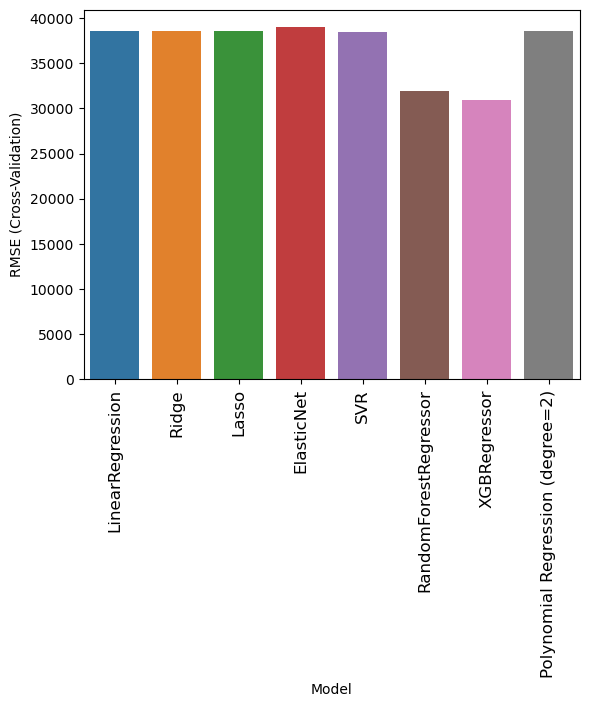

In [59]:
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.xticks(rotation=90, size=12)
plt.show()

# **XGb regressor is best here.**

In [60]:
import pickle
pickle.dump(xgb,open('xgb.pickle','wb'))
pickle.dump(scaler,open('scaler.pickle','wb'))